In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

In [2]:
import numpy as np
import matplotlib.pyplot as plt    #그래프 확인 용 라이브러리

## Model 클래스

In [3]:
class Model(nn.Module):
    def __init__(self):  # 모델의 상세 구조 정의
        super(Model, self).__init__() #모델들을 nn.Module로부터 상속 받음
        self.fc1 = nn.Linear(1, 128) # 히든레이어 : 입력 = 1, 출력 128
        self.fc2 = nn.Linear(128, 128) # 입력 = 128, 출력 128 => 파라미터 128*128개가 필요함
        self.fc3 = nn.Linear(128, 128)
        self.fc4 = nn.Linear(128, 1, bias=False)

    def forward (self, x): #모델을 이용하여 실제로 연산할 때 호출되는 함수
        x = F.relu(self.fc1(x)) #렐?루
        x = F.relu(self.fc2(x))
        x = F.relu(self.fc3(x))
        x = self.fc4(x)
        return x

케라스로 치면
입력값1 -> fc1 -> relu -> fc2-> relu -> fc3-> relu -> fc4 -> 값 1개 리턴 이런 형식인거 같다.

복잡한 모델은 새로 배우는 수밖에

## 데이터 생성 함수 F(x)

In [4]:
def true_fun(X):
    noise = np.random.rand(X.shape[0])*0.4 -0.2
    return np.cos(1.5*np.pi*X) + X + noise

수식 F(x) = cos(1.5π *x)+ x + ε 을 넘파이로 구현

## plotting 함수

In [8]:
def plot_results(model):
    x = np.linspace(0, 5, 100)
    input_x  = torch.from_numpy(x).float().unsqueeze(1)
    plt.plot(x, true_fun(x), label="Truth")
    plt.plot(x, model(input_x).detach().numpy(), label="Prediction")
    plt.legend(loc='lower right', fontsize=15)
    plt.xlim((0, 5))
    plt.ylim((-1, 5))
    plt.grid()

## 메인 함수

In [9]:
def main():
    data_x = np.random.rand(10000)*5   
    #0~5 숫자를 10000개 샘플링 해서 인풋으로 사용
    model = Model()
    optimizer = optim.Adam(model.parameters(), lr=0.001)

    for step in range(10000):
        batch_x = np.random.choice(data_x, 32)
        # 1만개 중 랜덤하게 뽑힌 32개의 데이터로 mini-batch를 구성
        batch_x_tensor = torch.from_numpy(batch_x).float().unsqueeze(1) # 파이토치 텐서로 변환, 1인덱스는 배치차원?
        # unsqueeze() 괄호안에 인덱스에 해당하는 곳에 차원을 추가해준다.
        pred = model(batch_x_tensor) #변환된 파이토치 텐서를 모델에 넣자

        batch_y = true_fun(batch_x) # 원본 함수에 넣어서 real값을 구함
        truth = torch.from_numpy(batch_y).float().unsqueeze(1) # 통일석을 위해 똑같이 차원을 추가해줌
        loss = F.mse_loss(pred, truth) #손실 함수인 MSE를 계산

        optimizer.zero_grad()
        loss.mean().backward() # 역전파를 통한 그라디언트 계산이 일어남
        optimizer.step() #파라미터를 업데이트 함

    plot_results(model)

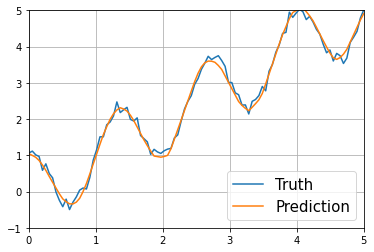

In [10]:
main()

학습을 통해 F(x) = cos(1.5π *x)+ x + ε 의 Truth함수를 

Prediction이 거의 유사하게 따라가고 있음을 알 수 있음

오히려 noise가 없는 원본함수에 더 가까운거 같다.